In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Let's dive into the data

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
Total score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0


In [7]:
df['Total score'] = df['math score'] + df['reading score'] + df['writing score'] 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [10]:
df.shape

(1000, 9)

In [25]:
df.isna().sum()

gender_male                                      0
race/ethnicity_group B                           0
race/ethnicity_group C                           0
race/ethnicity_group D                           0
race/ethnicity_group E                           0
parental level of education_bachelor's degree    0
parental level of education_high school          0
parental level of education_master's degree      0
parental level of education_some college         0
parental level of education_some high school     0
lunch_standard                                   0
test preparation course_none                     0
math score                                       0
reading score                                    0
writing score                                    0
Total score                                      0
dtype: int64

<BarContainer object of 1000 artists>

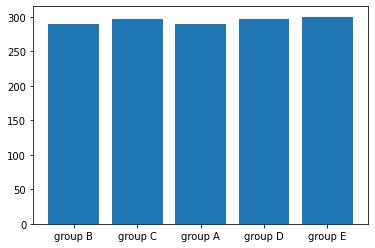

In [16]:
plt.bar(x='race/ethnicity', height='Total score', data=df)

#Preparation of data for training

In [18]:
df1=pd.get_dummies(df[df.columns[:5]], drop_first=True)
df1.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


In [19]:
df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course'], axis=1, inplace=True)
df=pd.concat([df1, df], axis=1)
df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score,Total score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74,218
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88,247
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93,278
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44,148
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75,229


In [21]:
X = df.drop(['Total score'], axis=1)
y = df['Total score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

In [98]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
clf = LogisticRegression(penalty='l1',tol=1e-4, solver='saga')

In [100]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='l1', solver='saga')

In [101]:
pred = clf.predict(X_test)
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_test, y_test)))

Accuracy from sk-learn: 0.013333333333333334


Logistic regression performed very poorly, I used L2 adjustment, but everything is also very bad with it. Let's try Logistic Regression

In [102]:
lnr = LinearRegression()

In [103]:
lnr.fit(X_train, y_train)

LinearRegression()

In [104]:
lrpred = lnr.predict(X_test)
print ('Accuracy from sk-learn: {0}'.format(lnr.score(X_test, y_test)))

Accuracy from sk-learn: 1.0


In [105]:
print("The Mean Absolute Error : ",metrics.mean_absolute_error(y_test,lrpred))

The Mean Absolute Error :  2.3637388342952666e-14


In [106]:
print("The Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(y_test,lrpred)))

The Root Mean Squared Error :  3.4135644425146874e-14


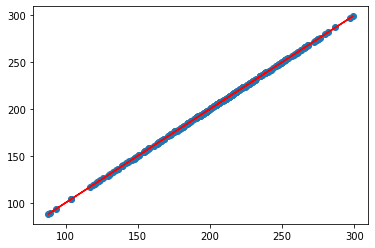

In [107]:
# Our predictions
plt.scatter(y_test,lrpred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

The last one we try DecisiontreeRegtessione

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
dtr = DecisionTreeRegressor(max_depth=2)

In [110]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [111]:
dtrpred = dtr.predict(X_test)
print ('Accuracy from sk-learn: {0}'.format(dtr.score(X_test, y_test)))

Accuracy from sk-learn: 0.9899159907472841


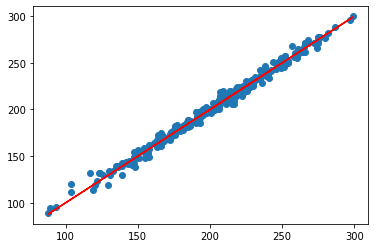

In [113]:
# Our predictions
plt.scatter(y_test,dtrpred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

Not bad for Tree Regresion



#Thank you for your attention, if you have any questions for me - ask)


